# Import and Initialize

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.legacy.disaggregate import CombinatorialOptimisation
from nilmtk.utils import print_dict
import nilmtk.metrics as metrics
from nilmtk.legacy.disaggregate.fhmm_exact import FHMM
from nilmtk.metrics import f1_score, rms_error_power, mean_normalized_error_power

%matplotlib inline
rcParams['figure.figsize'] = (13, 6)

# Load Data

In [2]:
sample_period = 1

test_data = DataSet('../SeniorDataset/h5_files/96Hour_' + str(sample_period) + 'Second.h5')
train_data = DataSet('../SeniorDataset/h5_files/96Hour_' + str(sample_period) + 'Second.h5')

# train_data.set_window(start='2022-01-01T00', end='2022-01-02T23') #48 hr
# train_data.set_window(start='2022-01-01T00', end='2022-01-02T00') #24 hr
train_data.set_window(start='2022-01-02T00', end='2022-01-02T12') #12 hr
# train_data.set_window(start='2022-01-01T08', end='2022-01-01T12') #4 hr
# train_data.set_window(start='2022-01-02T00', end='2022-01-02T01') #1 hr
# train_data.set_window(start='2022-01-01T0430', end='2022-01-01T0500') #30 min

train_elec = train_data.buildings[1].elec
train_mains = train_elec.mains()
train_submeters = train_elec.submeters()

# test_data.set_window(start='2022-01-03T00', end='2022-01-04T23') #48 hr
# test_data.set_window(start='2022-01-03T00', end='2022-01-04T00') #24 hr
test_data.set_window(start='2022-01-04T00', end='2022-01-04T12') #12 hr
# test_data.set_window(start='2022-01-03T08', end='2022-01-03T12') #4 hr
# test_data.set_window(start='2022-01-03T08', end='2022-01-03T09') #1 hr
# test_data.set_window(start='2022-01-03T0230', end='2022-01-03T0300') #30 min

test_elec = test_data.buildings[1].elec
test_mains = test_elec.mains()
test_submeters = test_elec.submeters()

f = FHMM()

# Train FHMM Model

In [3]:
f.train(train_submeters, physical_quantity='power', ac_type='apparent', sample_period=sample_period)

/building1/elec/meter2 (Group) ''
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='Senior Design Dataset', appliances=[Appliance(type='fridge', instance=1)])' with 3 states
/building1/elec/meter3 (Group) ''
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='Senior Design Dataset', appliances=[Appliance(type='kettle', instance=1)])' with 3 states
/building1/elec/meter4 (Group) ''
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='Senior Design Dataset', appliances=[Appliance(type='microwave', instance=1)])' with 3 states
/building1/elec/meter5 (Group) ''
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='Senior Design Dataset', appliances=[Appliance(type='toaster', instance=1)])' with 3 states
/building1/elec/meter6 (Group) ''
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='Senior Design Dataset', appliances=[Appliance(type='hair dryer', instance=1)])' with 3 states
/building1/e

# Disaggregate

In [4]:
filename = 'output3.h5'

In [5]:
output = HDFDataStore(filename, 'w')
#MAKE SURE THE SAMPLE PERIOD CORRESPONDS WITH THE DATA
df = f.disaggregate(test_mains, output, sample_period=sample_period)
output.close()

/building1/elec/meter1 (Group) ''
/building1/elec/meter1 (Group) ''
/building1/elec/meter1 (Group) ''
/building1/elec/meter1 (Group) ''
/building1/elec/meter1 (Group) ''


# Visualize the Data

In [6]:
pred_data = DataSet(filename)
pred_elec = pred_data.buildings[1].elec

/building1/elec/meter2 (Group) ''
/building1/elec/meter2 (Group) ''


/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5, 0, 'Time')

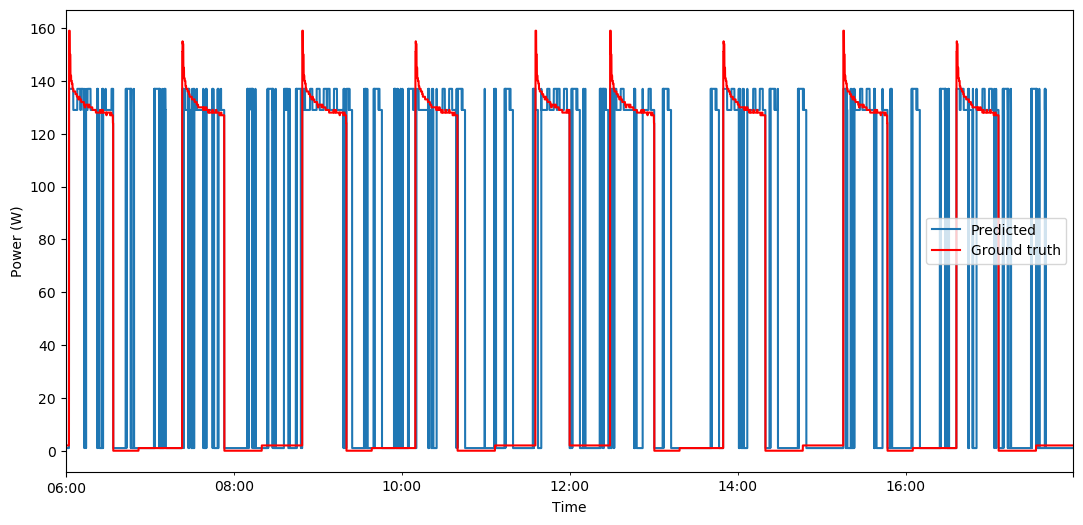

In [7]:
df_pred = next(pred_elec['fridge', 1].load())
df_gt = next(test_elec['fridge', 1].load())

merged_df = pd.merge(df_pred, df_gt, left_index=True, right_index=True)

merged_df['power_x', 'apparent'].plot()
merged_df['power_y', 'apparent'].plot(c='r')

plt.legend(["Predicted", "Ground truth"])
plt.ylabel("Power (W)")
plt.xlabel("Time")

/building1/elec/meter3 (Group) ''
/building1/elec/meter3 (Group) ''


/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5, 0, 'Time')

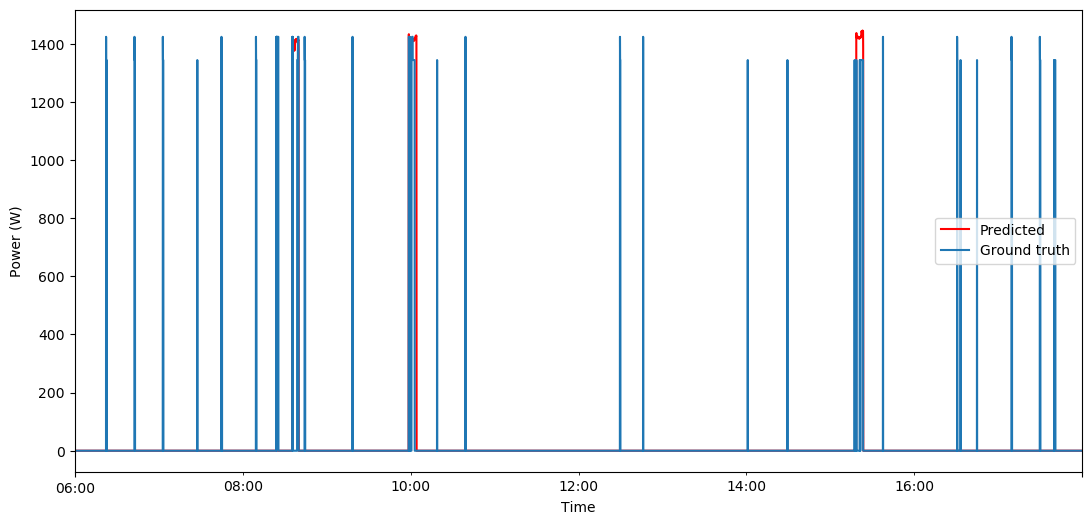

In [8]:
df_pred = next(pred_elec['kettle', 1].load())
df_gt = next(test_elec['kettle', 1].load())

merged_df = pd.merge(df_pred, df_gt, left_index=True, right_index=True)
merged_df['power_y', 'apparent'].plot(c='r')
merged_df['power_x', 'apparent'].plot()
plt.legend(["Predicted", "Ground truth"])
plt.ylabel("Power (W)")
plt.xlabel("Time")

/building1/elec/meter4 (Group) ''
/building1/elec/meter4 (Group) ''


/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5, 0, 'Time')

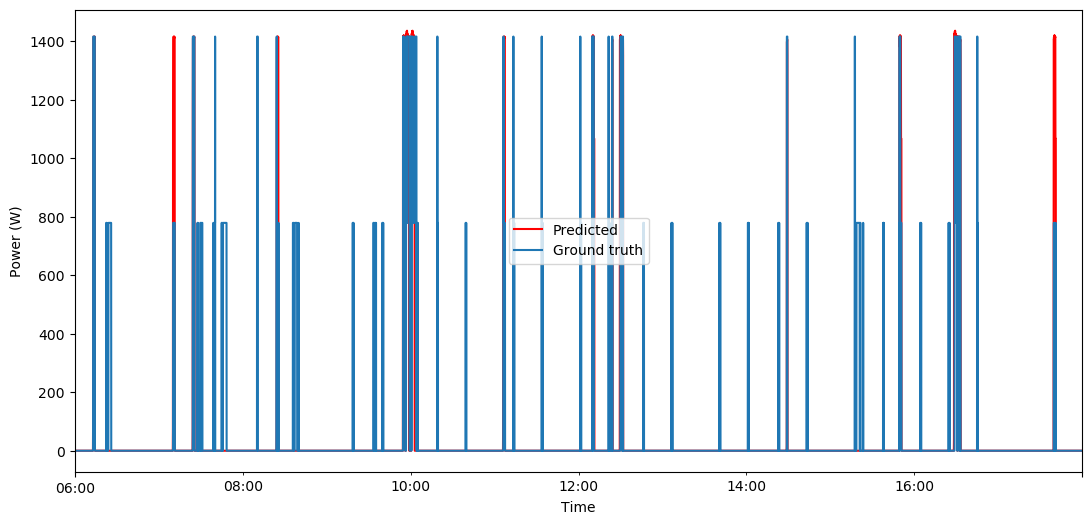

In [9]:
df_pred = next(pred_elec['microwave', 1].load())
df_gt = next(test_elec['microwave', 1].load())

merged_df = pd.merge(df_pred, df_gt, left_index=True, right_index=True)
merged_df['power_y', 'apparent'].plot(c='r')
merged_df['power_x', 'apparent'].plot()
plt.legend(["Predicted", "Ground truth"])
plt.ylabel("Power (W)")
plt.xlabel("Time")

/building1/elec/meter5 (Group) ''
/building1/elec/meter5 (Group) ''


/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5, 0, 'Time')

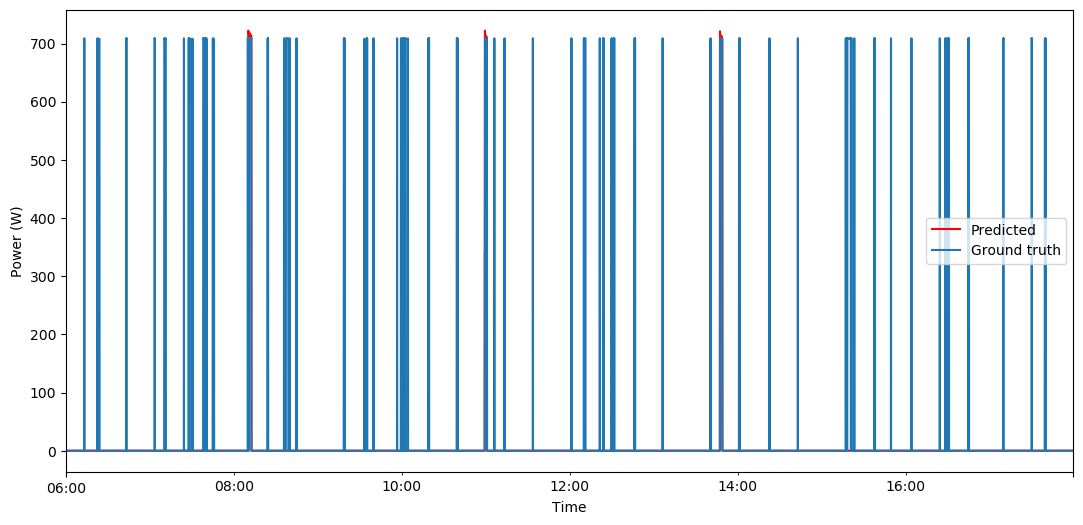

In [10]:
df_pred = next(pred_elec['toaster', 1].load())
df_gt = next(test_elec['toaster', 1].load())

merged_df = pd.merge(df_pred, df_gt, left_index=True, right_index=True)
merged_df['power_y', 'apparent'].plot(c='r')
merged_df['power_x', 'apparent'].plot()
plt.legend(["Predicted", "Ground truth"])
plt.ylabel("Power (W)")
plt.xlabel("Time")

/building1/elec/meter6 (Group) ''
/building1/elec/meter6 (Group) ''


/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5, 0, 'Time')

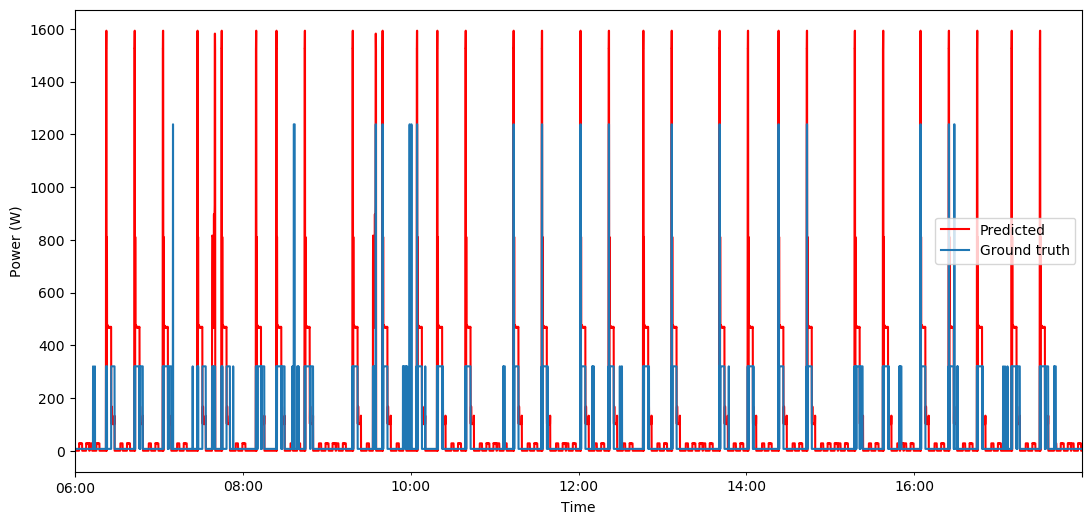

In [11]:
df_pred = next(pred_elec['hair dryer', 1].load())
df_gt = next(test_elec['hair dryer', 1].load())

merged_df = pd.merge(df_pred, df_gt, left_index=True, right_index=True)
merged_df['power_y', 'apparent'].plot(c='r')
merged_df['power_x', 'apparent'].plot()
plt.legend(["Predicted", "Ground truth"])
plt.ylabel("Power (W)")
plt.xlabel("Time")

/building1/elec/meter7 (Group) ''
/building1/elec/meter7 (Group) ''


/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5, 0, 'Time')

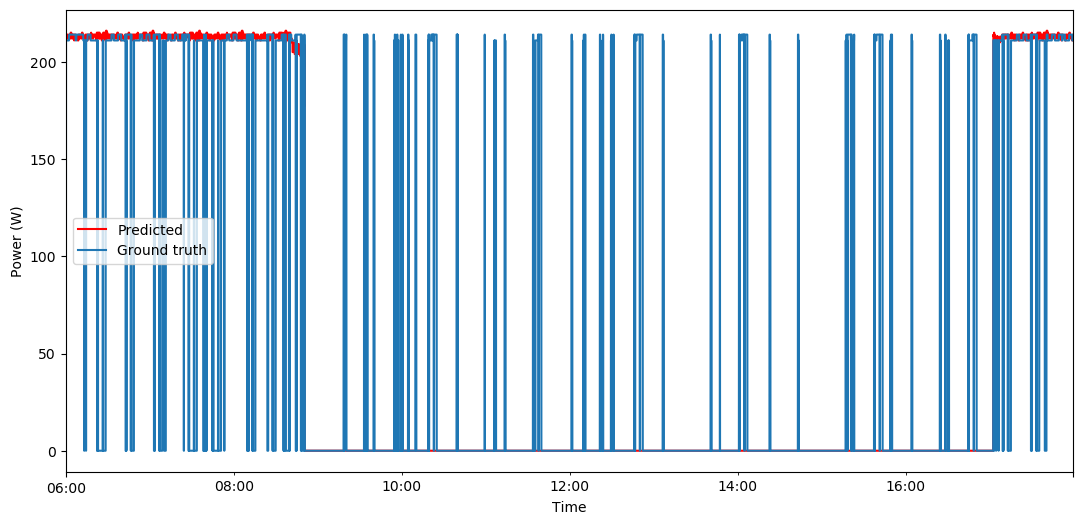

In [12]:
df_pred = next(pred_elec['slow cooker', 1].load())
df_gt = next(test_elec['slow cooker', 1].load())

merged_df = pd.merge(df_pred, df_gt, left_index=True, right_index=True)
merged_df['power_y', 'apparent'].plot(c='r')
merged_df['power_x', 'apparent'].plot()
plt.legend(["Predicted", "Ground truth"])
plt.ylabel("Power (W)")
plt.xlabel("Time")

# Statistical Performance Metrics

we want:
-f1 score
-error in assigned energy
-fraction energy assigned correctly
-rms power error

In [30]:
prediction_data = DataSet('output.h5')

predictions_metergroup = prediction_data.buildings[1].elec
ground_truth_metergroup = test_elec

f1 = f1_score(predictions_metergroup, ground_truth_metergroup)
mnp = mean_normalized_error_power(predictions_metergroup, ground_truth_metergroup)
rmse = rms_error_power(predictions_metergroup, ground_truth_metergroup)


/building1/elec/meter2 (Group) ''
/building1/elec/meter2 (Group) ''
/building1/elec/meter2 (Group) ''
/building1/elec/meter2 (Group) ''
/building1/elec/meter3 (Group) ''
/building1/elec/meter3 (Group) ''
/building1/elec/meter3 (Group) ''
/building1/elec/meter3 (Group) ''
/building1/elec/meter4 (Group) ''
/building1/elec/meter4 (Group) ''
/building1/elec/meter4 (Group) ''
/building1/elec/meter4 (Group) ''
/building1/elec/meter5 (Group) ''
/building1/elec/meter5 (Group) ''
/building1/elec/meter5 (Group) ''
/building1/elec/meter5 (Group) ''
/building1/elec/meter6 (Group) ''
/building1/elec/meter6 (Group) ''
/building1/elec/meter6 (Group) ''
/building1/elec/meter6 (Group) ''
/building1/elec/meter7 (Group) ''
/building1/elec/meter7 (Group) ''
/building1/elec/meter7 (Group) ''
/building1/elec/meter7 (Group) ''
/building1/elec/meter2 (Group) ''
/building1/elec/meter2 (Group) ''


/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
print('F1:')
print(f1)

2    0.719414
3    0.394098
4    0.339029
5    0.221980
6    0.540712
7    0.830095
dtype: float64


In [ ]:
print("Mean Normalized Error Power:")
print(mnp)
print("RMSE:")
print(rmse)